In [2]:
import pandas as pd

df = pd.read_csv('data.csv')

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', errors='coerce')
df['Ship Date'] = df['Ship Date'] + pd.DateOffset(years=2)

df['Year'] = df['Order Date'].dt.year

df['Days to Ship'] = (df['Ship Date'] - df['Order Date']).dt.days



df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Days to Ship
0,1,CA-2020-152156,2022-11-08,2022-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2022,3
1,2,CA-2020-152156,2022-11-08,2022-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2022,3
2,3,CA-2020-138688,2022-06-12,2022-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2022,4
3,4,US-2019-108966,2021-10-11,2021-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2021,7
4,5,US-2019-108966,2021-10-11,2021-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2021,7


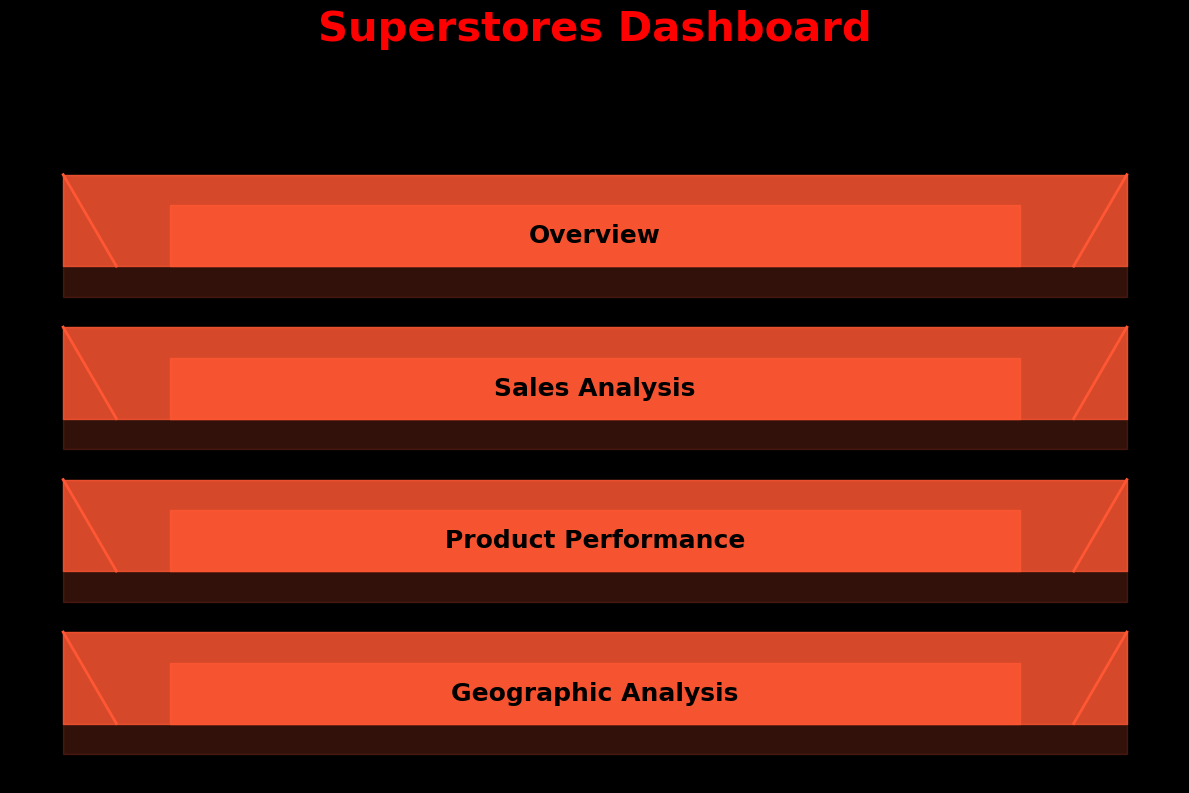

In [1]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#FF5733', '#FF5733', '#FF5733', '#FF5733']

sections = ['Overview', 'Sales Analysis', 'Product Performance', 'Geographic Analysis']

section_height = 0.2
section_y_positions = [0.75, 0.5, 0.25, 0]

for i, (color, y_position) in enumerate(zip(colors, section_y_positions)):
    ax.fill_between([0, 1], y_position, y_position - section_height, color=color, alpha=0.2)

for i, (section, color, y_position) in enumerate(zip(sections, colors, section_y_positions)):
    ax.fill_between([0.1, 0.9], y_position - 0.05, y_position - section_height + 0.05, color=color, alpha=0.8)
    ax.text(0.5, y_position - section_height/2, section, horizontalalignment='center', verticalalignment='center', fontsize=18, fontweight='bold', color='black')

for i, (color, y_position) in enumerate(zip(colors, section_y_positions)):
    ax.fill_between([0, 0.1, 0.9, 1], [y_position]*4, [y_position - section_height + 0.05]*4, color=color, alpha=0.8)
    ax.plot([0, 0.05], [y_position, y_position - section_height + 0.05], color=color, linewidth=2)
    ax.plot([0.95, 1], [y_position - section_height + 0.05, y_position], color=color, linewidth=2)


ax.text(0.5, 0.97, 'Superstores Dashboard', horizontalalignment='center', fontsize=30, fontweight='bold', color='red')

ax.axis('off')

fig.patch.set_facecolor('black')


plt.tight_layout()
plt.show()


In [ ]:

#Summary data

In [75]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('data.csv')

product_sales = df.groupby('Product Name')['Sales'].sum().reset_index()

product_sales = product_sales.sort_values(by='Sales', ascending=False)

top_10_products = product_sales.head(10)

fig = go.Figure(go.Bar(
    x=top_10_products['Sales'],
    y=top_10_products['Product Name'],
    orientation='h',
    marker=dict(color='red')  
))

fig.update_layout(
    title='Top 10 Products by Sales',
    xaxis_title='Total Sales',
    yaxis_title='Product Name',
    yaxis=dict(autorange="reversed", showgrid=False),  
    bargap=0.1,
    margin=dict(l=0, r=0, t=50, b=0),
    plot_bgcolor='black',  
    paper_bgcolor='black', 
    font=dict(color='white'),  
    title_font=dict(color='white', size=20),  
    xaxis=dict(showgrid=False),  
)

fig.show()


In [77]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('data.csv')

product_profit = df.groupby('Product Name')['Profit'].sum().reset_index()

product_profit = product_profit.sort_values(by='Profit', ascending=False)

top_10_products = product_profit.head(10)

fig = go.Figure(go.Bar(
    x=top_10_products['Profit'],
    y=top_10_products['Product Name'],
    orientation='h',
    marker=dict(color='green')  
))

fig.update_layout(
    title='Top 10 Products by Profit',
    xaxis_title='Total Profit',
    yaxis_title='Product Name',
    yaxis=dict(autorange="reversed"),
    bargap=0.1,
    margin=dict(l=0, r=0, t=50, b=0),
    plot_bgcolor='black',  
    paper_bgcolor='black',  
    font=dict(color='white'),  
    title_font=dict(color='white', size=20),  
    xaxis=dict(showgrid=False),  
)

fig.show()


In [78]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('data.csv')

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', errors='coerce')
df['Ship Date'] = df['Ship Date'] + pd.DateOffset(years=2)

df['Year'] = df['Order Date'].dt.year

df['Days to Ship'] = (df['Ship Date'] - df['Order Date']).dt.days

average_days_to_ship = df['Days to Ship'].mean()

min_days_to_ship = df['Days to Ship'].min()
max_days_to_ship = df['Days to Ship'].max()

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=average_days_to_ship,
    title={'text': "<b>Average Days to Ship</b>", 'font': {'size': 20, 'color': 'purple'}},
    domain={'x': [0, 1], 'y': [0, 1]},
    gauge={'axis': {'range': [min_days_to_ship, max_days_to_ship], 'tickfont': {'size': 12, 'color': 'purple'}},
           'bar': {'color': "rgba(255, 0, 255, 0.8)"},
           'steps': [
               {'range': [min_days_to_ship, max_days_to_ship], 'color': "rgba(255, 0, 255, 0.5)"}],
           'threshold': {
               'line': {'color': "rgba(255, 0, 255, 0.8)", 'width': 4},
               'thickness': 0.75,
               'value': average_days_to_ship}}
))

fig.update_layout(
    margin=dict(t=20, b=20, l=20, r=20),
    paper_bgcolor="rgba(255, 255, 255, 0)",
    plot_bgcolor="rgba(255, 255, 255, 0)"
)

fig.show()


In [83]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('data.csv')

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y %H:%M:%S')

df['Year'] = df['Order Date'].dt.year

furniture_df = df[df['Category'] == 'Furniture']
office_supplies_df = df[df['Category'] == 'Office Supplies']
technology_df = df[df['Category'] == 'Technology']

furniture_sales = furniture_df.groupby('Year')['Sales'].sum().reset_index()
office_supplies_sales = office_supplies_df.groupby('Year')['Sales'].sum().reset_index()
technology_sales = technology_df.groupby('Year')['Sales'].sum().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x=furniture_sales['Year'], y=furniture_sales['Sales'], name='Furniture', marker_color='blue'))
fig.add_trace(go.Bar(x=office_supplies_sales['Year'], y=office_supplies_sales['Sales'], name='Office Supplies', marker_color='green'))
fig.add_trace(go.Bar(x=technology_sales['Year'], y=technology_sales['Sales'], name='Technology', marker_color='red'))

fig.update_layout(
    title='Sales Trends by Product Category Over the Years',
    xaxis_title='Year',
    yaxis_title='Total Sales',
    barmode='stack',  
    legend_title='Product Category',
    plot_bgcolor='white',  
    font=dict(color='black'),  
    xaxis=dict(
        tickmode='array',
        tickvals=furniture_sales['Year'],  
        ticktext=furniture_sales['Year'].astype(int), 
    )
)

fig.show()
